In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,auc
import seaborn as sns

In [3]:
data = pd.read_csv("fraudTrain.csv")

In [4]:
data.shape

(1296675, 23)

In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


# EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
data = data.drop('Unnamed: 0',axis=1)

In [10]:
data.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [15]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

# Finding Null Percentage in dataset

In [20]:
perc = data.isna().mean()*100

In [21]:
perc

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [23]:
pd.DataFrame({
                "column" : perc.index,
                "Null Percentage" : perc.values

})

,column,Null Percentage
0,trans_date_trans_time,0.0
1,cc_num,0.0
2,merchant,0.0
3,category,0.0
4,amt,0.0
5,first,0.0
6,last,0.0
7,gender,0.0
8,street,0.0
9,city,0.0


# Finding spar percent

In [24]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [31]:
col_with_0 = []
for i in data.columns:
    perc_of_zero = (data[i] ==0).mean()*100
    col_with_0.append((i,perc_of_zero))

In [32]:
col_with_0

[('trans_date_trans_time', 0.0),
 ('cc_num', 0.0),
 ('merchant', 0.0),
 ('category', 0.0),
 ('amt', 0.0),
 ('first', 0.0),
 ('last', 0.0),
 ('gender', 0.0),
 ('street', 0.0),
 ('city', 0.0),
 ('state', 0.0),
 ('zip', 0.0),
 ('lat', 0.0),
 ('long', 0.0),
 ('city_pop', 0.0),
 ('job', 0.0),
 ('dob', 0.0),
 ('trans_num', 0.0),
 ('unix_time', 0.0),
 ('merch_lat', 0.0),
 ('merch_long', 0.0),
 ('is_fraud', 99.42113482561166)]

In [33]:
pd.DataFrame(col_with_0,columns= ['Column','Zero percentage'])

,Column,Zero percentage
0,trans_date_trans_time,0.000000
1,cc_num,0.000000
2,merchant,0.000000
3,category,0.000000
4,amt,0.000000
5,first,0.000000
6,last,0.000000
7,gender,0.000000
8,street,0.000000
9,city,0.000000


# Remove Duplicates

In [35]:
data.duplicated().sum()

0

# Plotting

In [38]:
data_1 = data[data['is_fraud'] == 1]
fig = px.scatter_mapbox( data_1,lat="lat",lon='long')
fig.update_layout(mapbox_style = 'carto-positron')

In [45]:
def plot_category(col_name):
    data_1 = data[col_name].value_counts()
    print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(10,5))
    data_1.plot(kind = "bar",color = color)
    plt.show()

In [46]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

F    709863
M    586812
Name: gender, dtype: int64


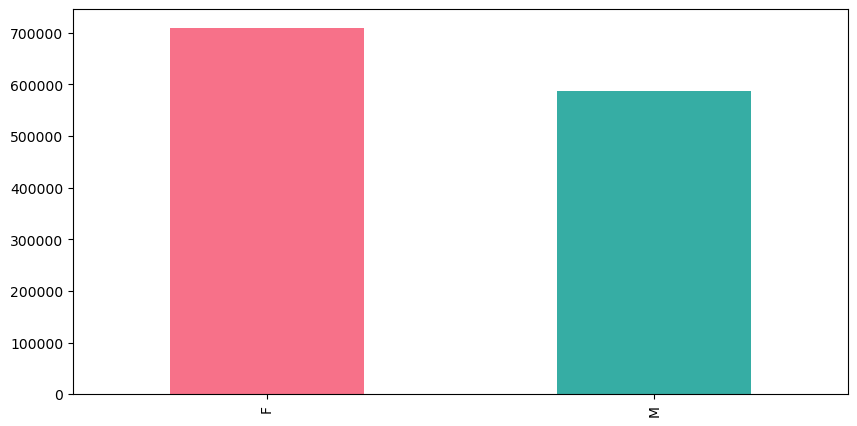

In [47]:
plot_category('gender')

In [49]:
def check_fraud(col_name):
    data_1 = data[data['is_fraud'] == 1][col_name].value_counts()
    print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(10,5))
    data_1.plot(kind = "bar",color = color)
    plt.show()

M    3771
F    3735
Name: gender, dtype: int64


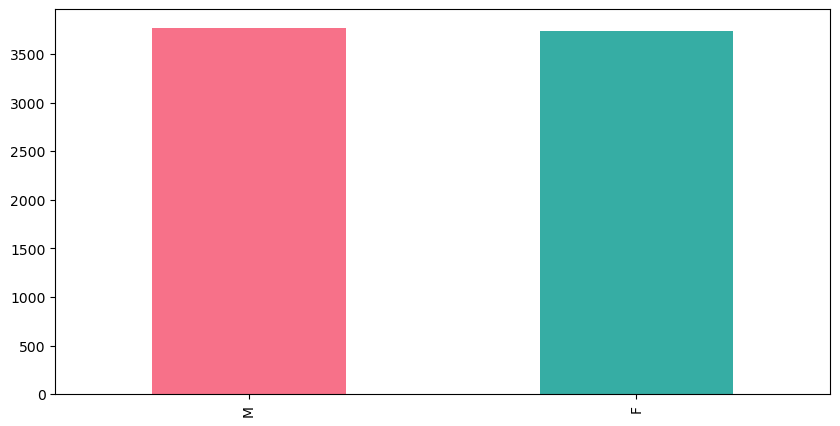

In [50]:
check_fraud('gender')

Birmingham      5617
San Antonio     5130
Utica           5105
Phoenix         5075
Meridian        5060
Thomas          4634
Conway          4613
Cleveland       4604
Warren          4599
Houston         4168
Burbank         4159
Naples          4155
Arcadia         4096
Indianapolis    4073
Brandon         4044
Name: city, dtype: int64


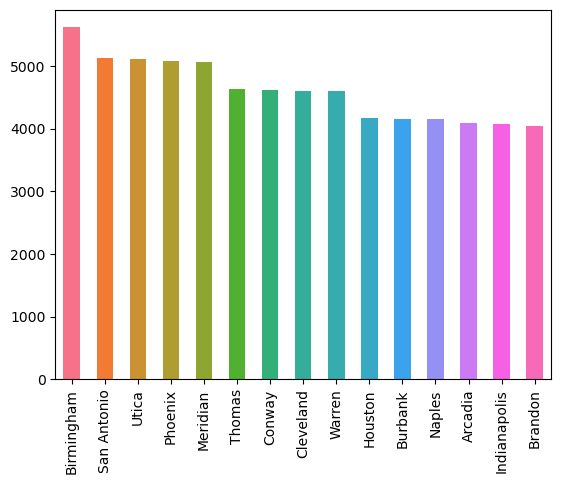

In [60]:
# Total Transactions
color = sns.color_palette(palette='husl',n_colors=15)
data['city'].value_counts()[:15].plot(kind='bar',color=color)
print(data['city'].value_counts()[:15])

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64


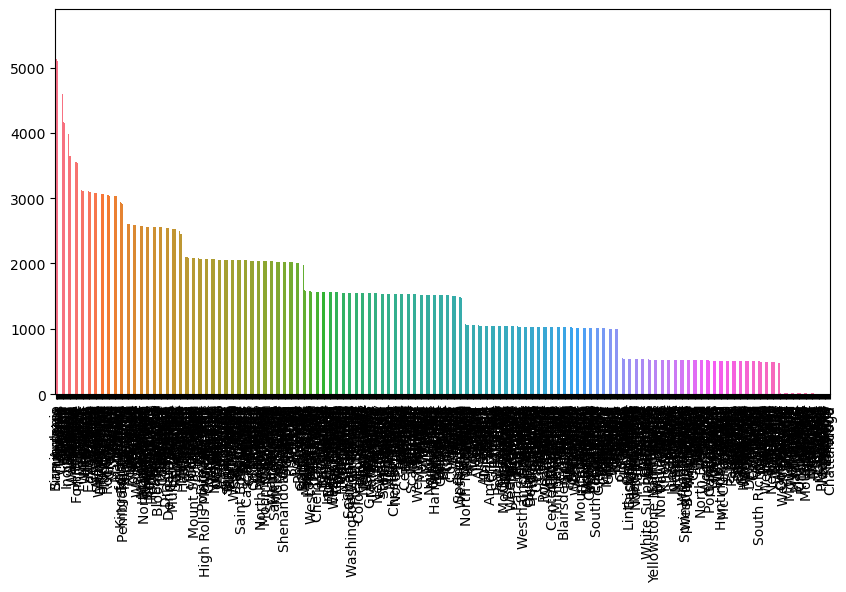

In [54]:
plot_category('city')

Houston         39
Warren          33
Huntsville      29
Naples          29
Dallas          27
Tulsa           27
Topeka          27
Detroit         26
Utica           25
Randolph        25
San Antonio     25
Albuquerque     24
Clearwater      24
Beaver Falls    24
Aurora          23
Name: city, dtype: int64


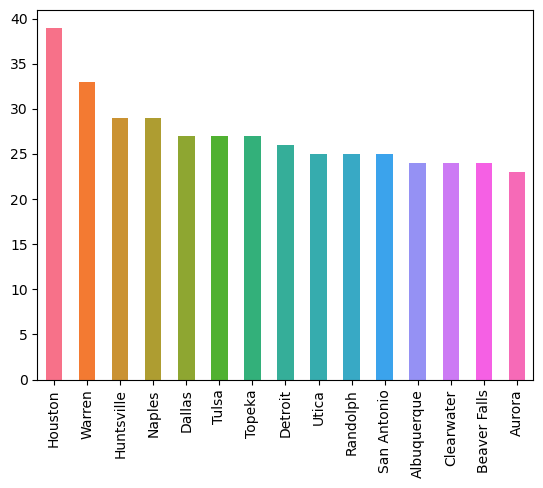

In [59]:
# is fraud
color = sns.color_palette(palette='husl',n_colors=15)
data[data['is_fraud'] == 1]['city'].value_counts()[:15].plot(kind='bar',color=color)
print(data[data['is_fraud'] == 1]['city'].value_counts()[:15])

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
fraud_Dickinson Ltd                     3434
fraud_Cummerata-Jones                   2736
fraud_Kutch LLC                         2734
fraud_Olson, Becker and Koch            2723
fraud_Stroman, Hudson and Erdman        2721
fraud_Rodriguez Group                   2716
fraud_Erdman-Kertzmann                  2705
fraud_Jenkins, Hauck and Friesen        2705
fraud_Kling Inc                         2687
fraud_Connelly, Reichert and Fritsch    2684
Name: merchant, dtype: int64


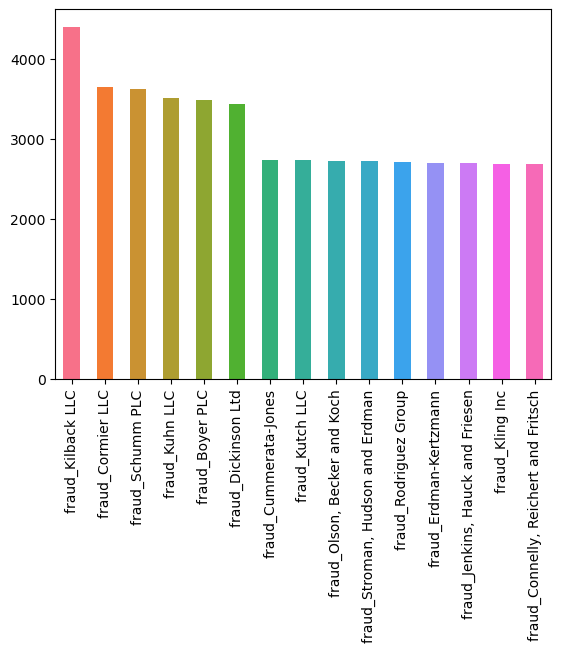

In [61]:
# Total Transactions
color = sns.color_palette(palette='husl',n_colors=15)
data['merchant'].value_counts()[:15].plot(kind='bar',color=color)
print(data['merchant'].value_counts()[:15])

fraud_Rau and Sons                     49
fraud_Cormier LLC                      48
fraud_Kozey-Boehm                      48
fraud_Doyle Ltd                        47
fraud_Vandervort-Funk                  47
fraud_Kilback LLC                      47
fraud_Padberg-Welch                    44
fraud_Kuhn LLC                         44
fraud_Terry-Huel                       43
fraud_Koepp-Witting                    42
fraud_Goyette Inc                      42
fraud_Jast Ltd                         42
fraud_Kiehn-Emmerich                   41
fraud_Kerluke-Abshire                  41
fraud_Schmeler, Bashirian and Price    41
Name: merchant, dtype: int64


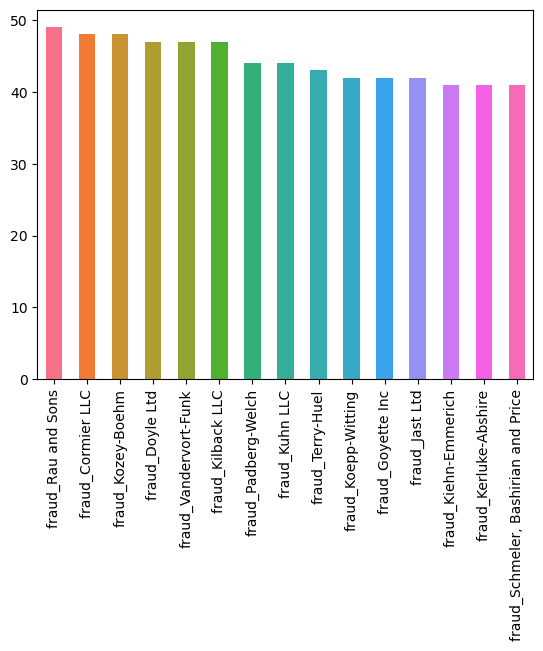

In [62]:
# is fraud
color = sns.color_palette(palette='husl',n_colors=15)
data[data['is_fraud'] == 1]['merchant'].value_counts()[:15].plot(kind='bar',color=color)
print(data[data['is_fraud'] == 1]['merchant'].value_counts()[:15])

# Removing Unwanted Columns

In [64]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [65]:
dr_cols = ['trans_date_trans_time','cc_num', 'merchant','first', 'last','dob', 'trans_num', 'unix_time']
data_2 = data.drop(dr_cols,axis=1)

In [66]:
data_2

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,36.841266,-111.690765,0
1296671,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",38.906881,-78.246528,0
1296672,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,33.619513,-105.130529,0
1296673,food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,42.788940,-103.241160,0


In [67]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   street      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  merch_lat   1296675 non-null  float64
 12  merch_long  1296675 non-null  float64
 13  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 138.5+ MB


In [68]:
data_2.select_dtypes("object")

,category,gender,street,city,state,job
0,misc_net,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling"
1,grocery_pos,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher
2,entertainment,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer
3,gas_transport,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney
4,misc_pos,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist
...,...,...,...,...,...,...
1296670,entertainment,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist
1296671,food_dining,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television"
1296672,food_dining,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect
1296673,food_dining,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator


In [69]:
lab_enc = LabelEncoder()

for i in data_2.select_dtypes("object").columns:
    data_2[i] = lab_enc.fit_transform(data_2[i])

In [70]:
data_2

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0
1,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0
2,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0
3,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0
4,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,154,330,44,84735,37.7175,-112.4777,258,215,36.841266,-111.690765,0
1296671,1,51.70,1,856,813,20,21790,39.2667,-77.5101,100,360,38.906881,-78.246528,0
1296672,1,105.93,1,158,346,32,88325,32.9396,-105.8189,899,308,33.619513,-105.130529,0
1296673,1,74.90,1,433,471,41,57756,43.3526,-102.5411,1126,485,42.788940,-103.241160,0


In [71]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  int32  
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  int32  
 3   street      1296675 non-null  int32  
 4   city        1296675 non-null  int32  
 5   state       1296675 non-null  int32  
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  int32  
 11  merch_lat   1296675 non-null  float64
 12  merch_long  1296675 non-null  float64
 13  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int32(6), int64(3)
memory usage: 108.8 MB


# Stat Analysis

In [73]:
corr_data = data_2.corr()

In [74]:
corr_data

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
category,1.000000,0.030867,-0.028259,0.002258,0.000784,0.000211,0.002371,-0.008660,-0.000767,0.009386,0.003490,-0.008519,-0.000736,0.020205
amt,0.030867,1.000000,0.001034,0.001346,-0.000565,0.001718,0.001843,-0.001926,-0.000187,0.005818,-0.000628,-0.001873,-0.000151,0.219404
gender,-0.028259,0.001034,1.000000,0.042679,0.016039,-0.031794,-0.065951,0.042935,0.050404,-0.028649,-0.079908,0.042645,0.050350,0.007642
street,0.002258,0.001346,0.042679,1.000000,-0.024811,0.014045,-0.053860,-0.012651,0.071328,-0.012530,-0.020229,-0.012517,0.071286,0.001448
city,0.000784,-0.000565,0.016039,-0.024811,1.000000,-0.043064,0.074757,-0.032044,-0.066703,0.034923,0.020446,-0.031828,-0.066718,-0.002092
state,0.000211,0.001718,-0.031794,0.014045,-0.043064,1.000000,-0.116264,0.213270,0.132465,-0.012197,0.042915,0.211844,0.132346,0.001730
zip,0.002371,0.001843,-0.065951,-0.053860,0.074757,-0.116264,1.000000,-0.114290,-0.909732,0.078467,-0.005678,-0.113561,-0.908924,-0.002162
lat,-0.008660,-0.001926,0.042935,-0.012651,-0.032044,0.213270,-0.114290,1.000000,-0.015533,-0.155730,-0.027593,0.993592,-0.015509,0.001894
long,-0.000767,-0.000187,0.050404,0.071328,-0.066703,0.132465,-0.909732,-0.015533,1.000000,-0.052715,-0.002729,-0.015452,0.999120,0.001721
city_pop,0.009386,0.005818,-0.028649,-0.012530,0.034923,-0.012197,0.078467,-0.155730,-0.052715,1.000000,-0.054945,-0.154781,-0.052687,0.002136


<AxesSubplot:>

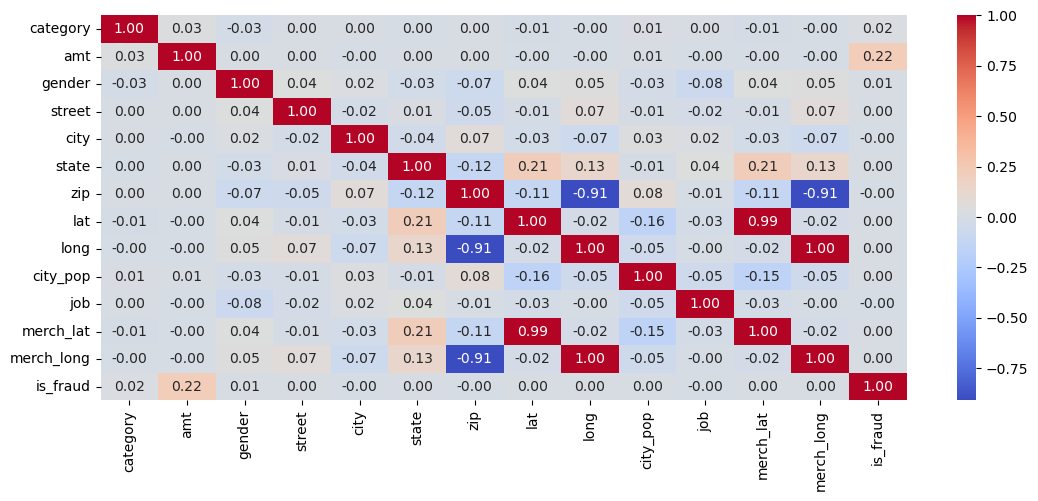

In [77]:
plt.figure(figsize=(13,5))
sns.heatmap(corr_data,annot=True,cmap='coolwarm',fmt='.2f')

In [78]:
# From the above heatmap, we came t oknow, there is high correlation between following so we want to drop the columns from the dataset
data_3 = data_2.drop(['merch_lat','merch_long'],axis=1)

In [79]:
data_3

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud
0,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,0
1,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,0
2,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,0
3,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,0
4,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,154,330,44,84735,37.7175,-112.4777,258,215,0
1296671,1,51.70,1,856,813,20,21790,39.2667,-77.5101,100,360,0
1296672,1,105.93,1,158,346,32,88325,32.9396,-105.8189,899,308,0
1296673,1,74.90,1,433,471,41,57756,43.3526,-102.5411,1126,485,0


# Hypo test

In [80]:
data_3.columns

Index(['category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'is_fraud'],
      dtype='object')

In [82]:
_,p_value = stats.ttest_ind(data_3['category'],data_3['long'])
p_value

0.0

In [ ]:
# try for other columns

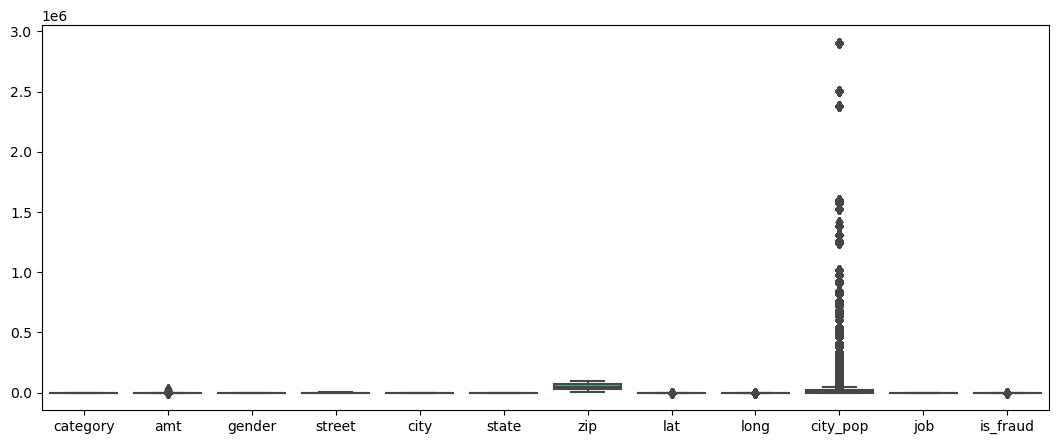

In [85]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data_3)
plt.show()

# Handling Outliers

1. Sqrt transform
2. Inverse transform
3. Boxcox transform
4. Z-score
5. Log2 transform

In [86]:
def inv_trans(x):
    return 1/x

data_4 = data_3.copy()
data_4['city_pop'] = data_4['city_pop'].apply(inv_trans)

In [87]:
data_4

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud
0,8,4.97,0,568,526,27,28654,36.0788,-81.1781,0.000286,370,0
1,4,107.23,0,435,612,47,99160,48.8878,-118.2105,0.006711,428,0
2,0,220.11,1,602,468,13,83252,42.1808,-112.2620,0.000241,307,0
3,2,45.00,1,930,84,26,59632,46.2306,-112.1138,0.000516,328,0
4,9,41.96,1,418,216,45,24433,38.4207,-79.4629,0.010101,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,154,330,44,84735,37.7175,-112.4777,0.003876,215,0
1296671,1,51.70,1,856,813,20,21790,39.2667,-77.5101,0.010000,360,0
1296672,1,105.93,1,158,346,32,88325,32.9396,-105.8189,0.001112,308,0
1296673,1,74.90,1,433,471,41,57756,43.3526,-102.5411,0.000888,485,0


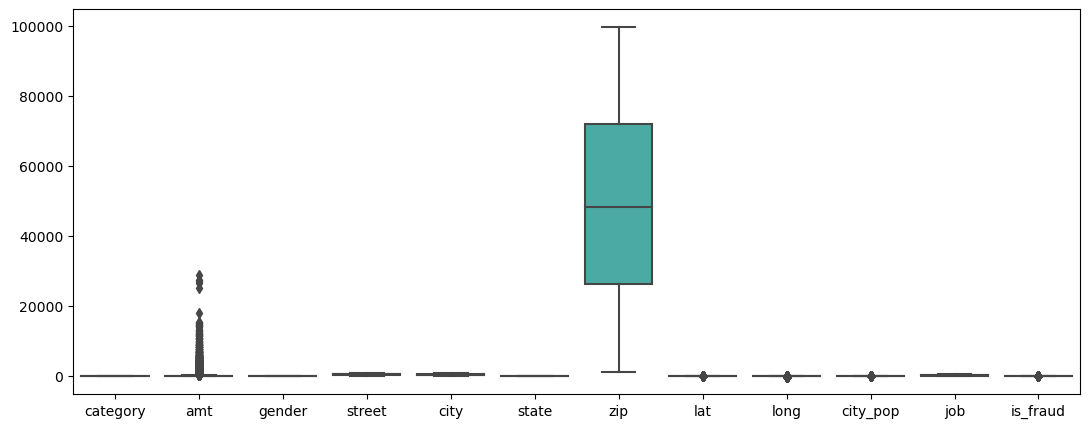

In [89]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data_4)
plt.show()

# Normality Check of Distribution

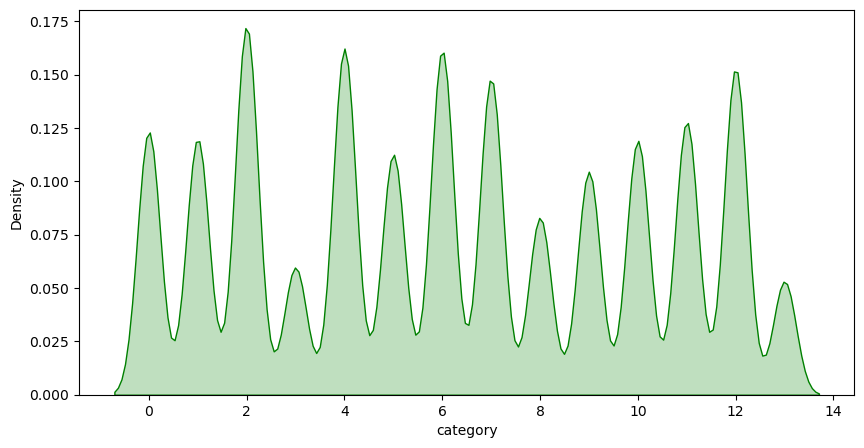

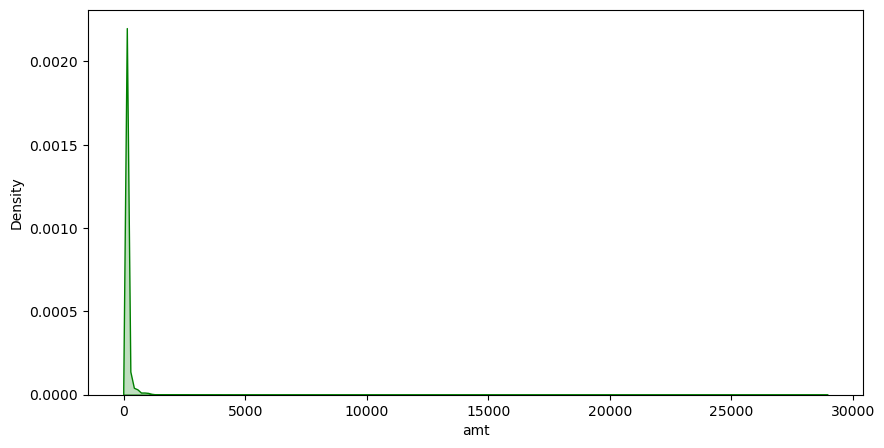

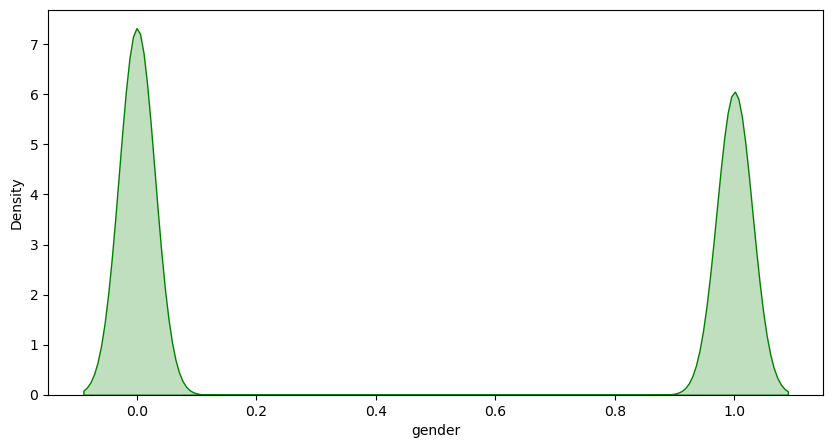

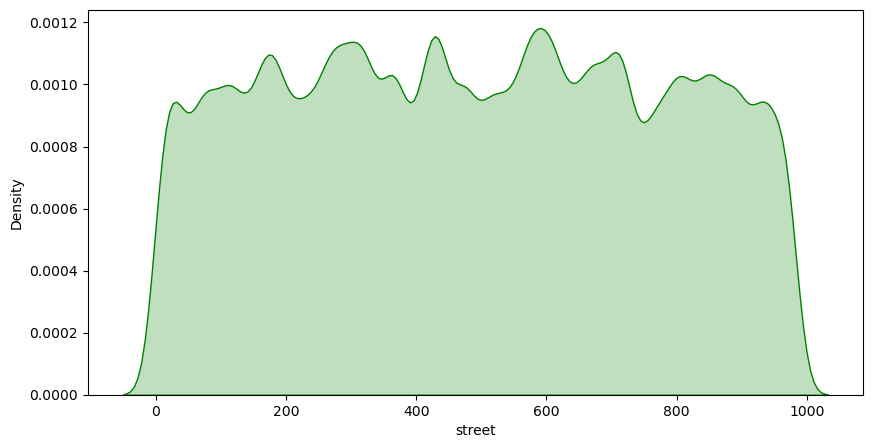

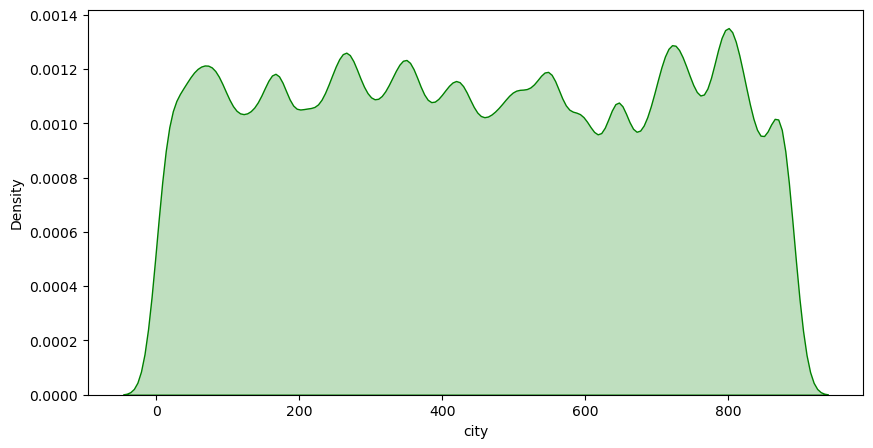

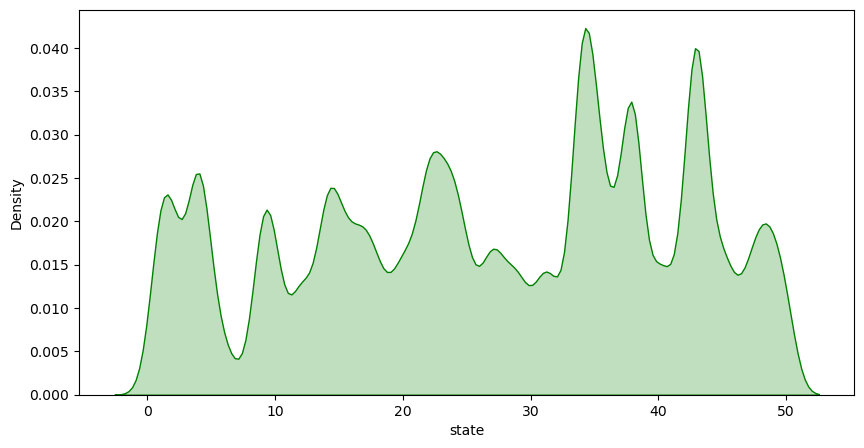

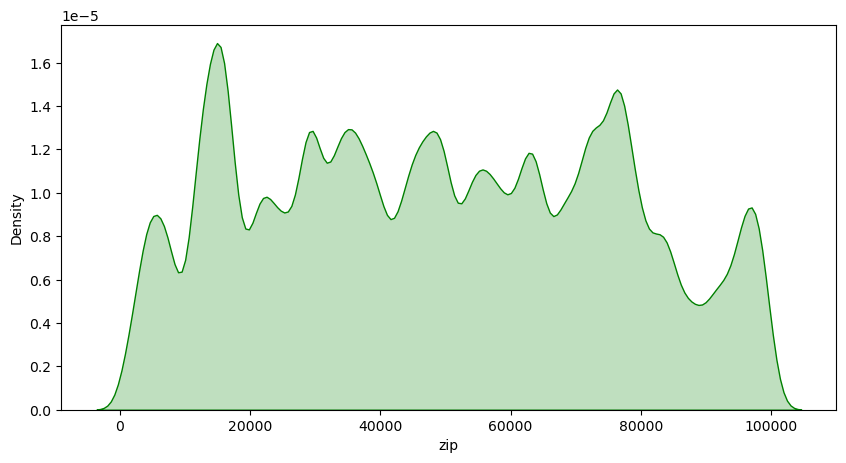

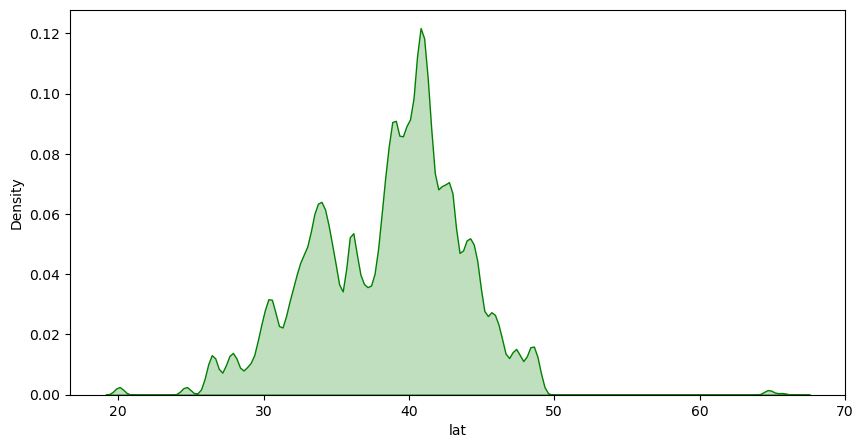

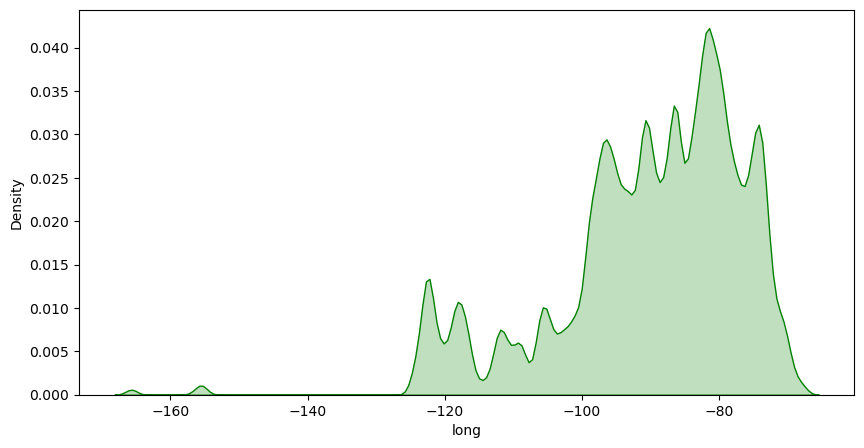

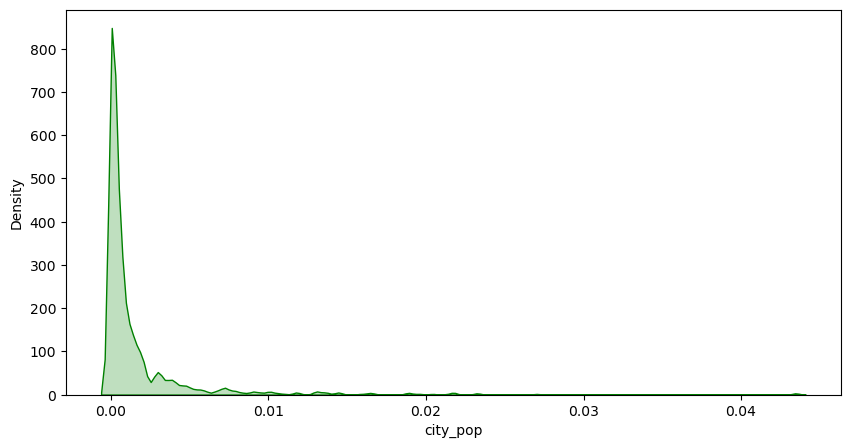

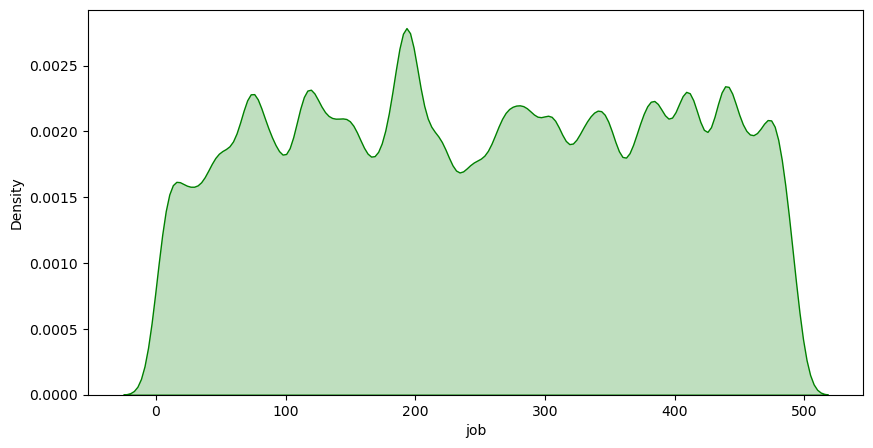

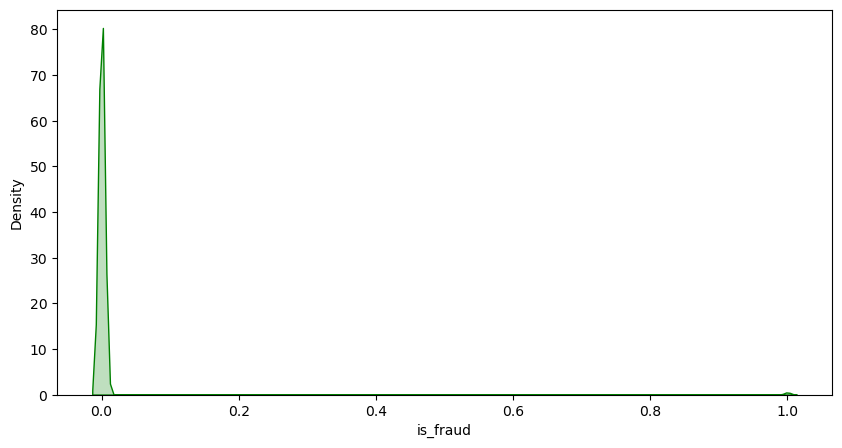

In [91]:
for i in data_4.columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=data_4[i],fill=True,color='g')
    plt.show()

# Feature Importance

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
build_data = data_4.drop('is_fraud',axis=1)
lab = data_4['is_fraud']

In [94]:
fs_model = RandomForestClassifier(n_estimators=20,random_state=40)

In [95]:
fs_model.fit(build_data,lab)

RandomForestClassifier(n_estimators=20, random_state=40)

In [96]:
fs_model.feature_importances_

array([0.20559919, 0.54699388, 0.00862234, 0.03016775, 0.03012273,
       0.01902804, 0.02850863, 0.02906473, 0.0296827 , 0.04057779,
       0.03163221])

In [98]:
fs_model.feature_names_in_

array(['category', 'amt', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job'], dtype=object)

In [102]:
pd.DataFrame({
    "Column" : fs_model.feature_names_in_,
    "Score" : fs_model.feature_importances_
}).sort_values('Score',ascending=False)

,Column,Score
1,amt,0.546994
0,category,0.205599
9,city_pop,0.040578
10,job,0.031632
3,street,0.030168
4,city,0.030123
8,long,0.029683
7,lat,0.029065
6,zip,0.028509
5,state,0.019028


In [105]:
data_5 = data_4[['category', 'amt','street', 'city','lat', 'long', 'city_pop', 'job','is_fraud']]
data_5

,category,amt,street,city,lat,long,city_pop,job,is_fraud
0,8,4.97,568,526,36.0788,-81.1781,0.000286,370,0
1,4,107.23,435,612,48.8878,-118.2105,0.006711,428,0
2,0,220.11,602,468,42.1808,-112.2620,0.000241,307,0
3,2,45.00,930,84,46.2306,-112.1138,0.000516,328,0
4,9,41.96,418,216,38.4207,-79.4629,0.010101,116,0
...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,154,330,37.7175,-112.4777,0.003876,215,0
1296671,1,51.70,856,813,39.2667,-77.5101,0.010000,360,0
1296672,1,105.93,158,346,32.9396,-105.8189,0.001112,308,0
1296673,1,74.90,433,471,43.3526,-102.5411,0.000888,485,0


# Model Building

In [107]:
data_train = data_5.drop('is_fraud',axis=1)
lab_train = data_5['is_fraud']

In [108]:
data_train

,category,amt,street,city,lat,long,city_pop,job
0,8,4.97,568,526,36.0788,-81.1781,0.000286,370
1,4,107.23,435,612,48.8878,-118.2105,0.006711,428
2,0,220.11,602,468,42.1808,-112.2620,0.000241,307
3,2,45.00,930,84,46.2306,-112.1138,0.000516,328
4,9,41.96,418,216,38.4207,-79.4629,0.010101,116
...,...,...,...,...,...,...,...,...
1296670,0,15.56,154,330,37.7175,-112.4777,0.003876,215
1296671,1,51.70,856,813,39.2667,-77.5101,0.010000,360
1296672,1,105.93,158,346,32.9396,-105.8189,0.001112,308
1296673,1,74.90,433,471,43.3526,-102.5411,0.000888,485


In [109]:
model = RandomForestClassifier(n_estimators=60,random_state=40)
model.fit(data_train,lab_train)

RandomForestClassifier(n_estimators=60, random_state=40)

In [110]:
accuracy_score(lab_train,model.predict(data_train))

0.9999753214953632

In [111]:
precision_score(lab_train,model.predict(data_train))

0.9998662386302836

In [112]:
recall_score(lab_train,model.predict(data_train))

0.9958699706901146

In [113]:
f1_score(lab_train,model.predict(data_train))

0.9978641035909759

# Save Model

In [114]:
import pickle

In [115]:
with open('model.pkl','wb') as m:
    pickle.dump(model,m)

# Read the pickle file

In [116]:
with open('model.pkl','rb') as m:
    pkl_model = pickle.load(m)

In [117]:
pkl_model

RandomForestClassifier(n_estimators=60, random_state=40)

In [119]:
pkl_model.predict(data_train[:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)